In [ ]:
# What--->                                Why----->             How-------->
# 1. Flask API                                                  1. IDE 
# API: Application Programming Interface
# Flask: web application Dev Framework
# framework: is a collection of libraries
#library : collection of methods
# 2. Mongodb    


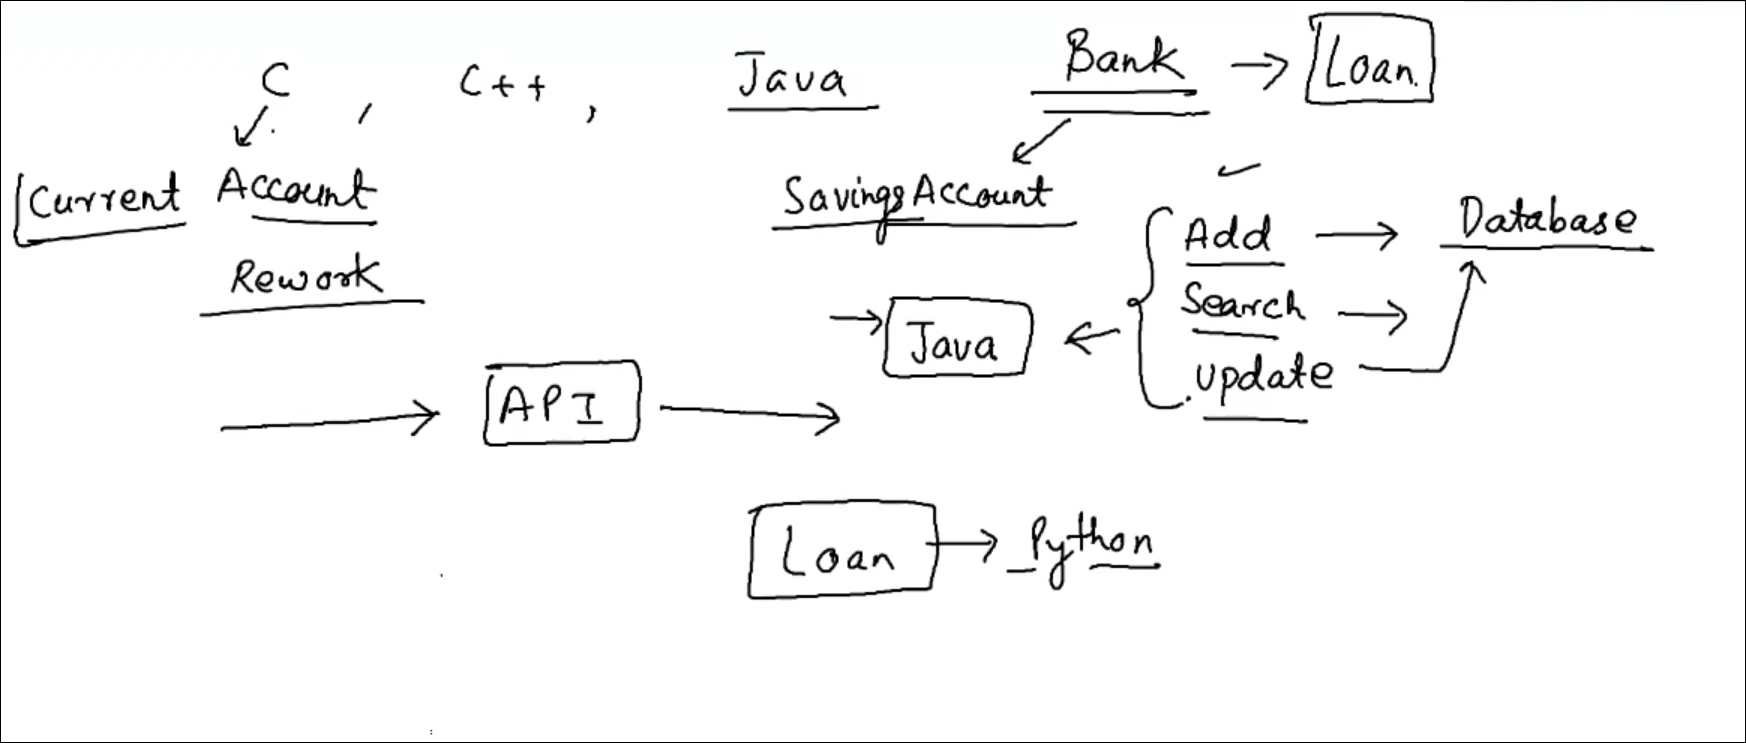

In [2]:

from IPython.display import Image, display

display(Image(filename='api.png'))



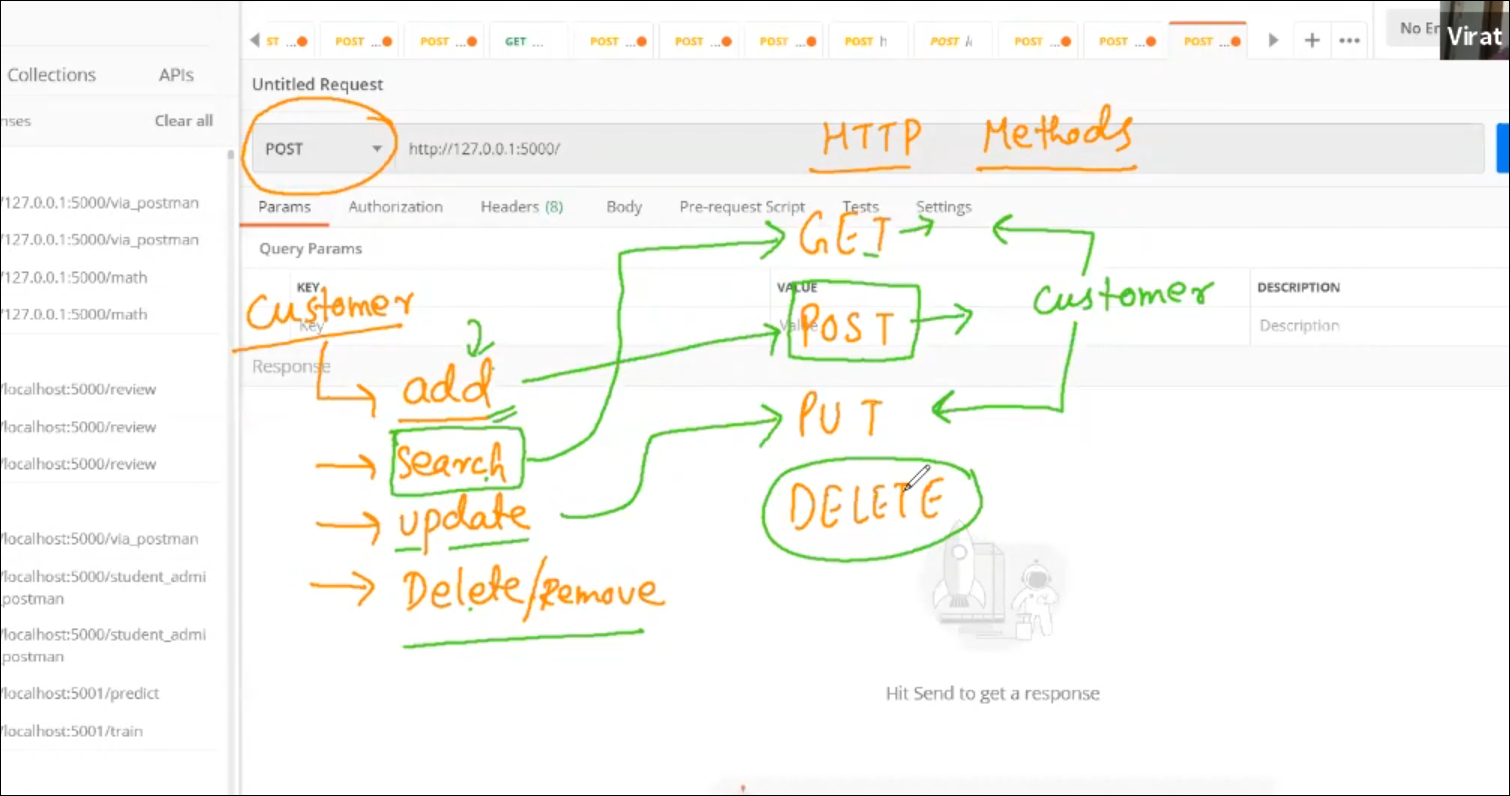

In [3]:

from IPython.display import Image, display

display(Image(filename='api2.png'))

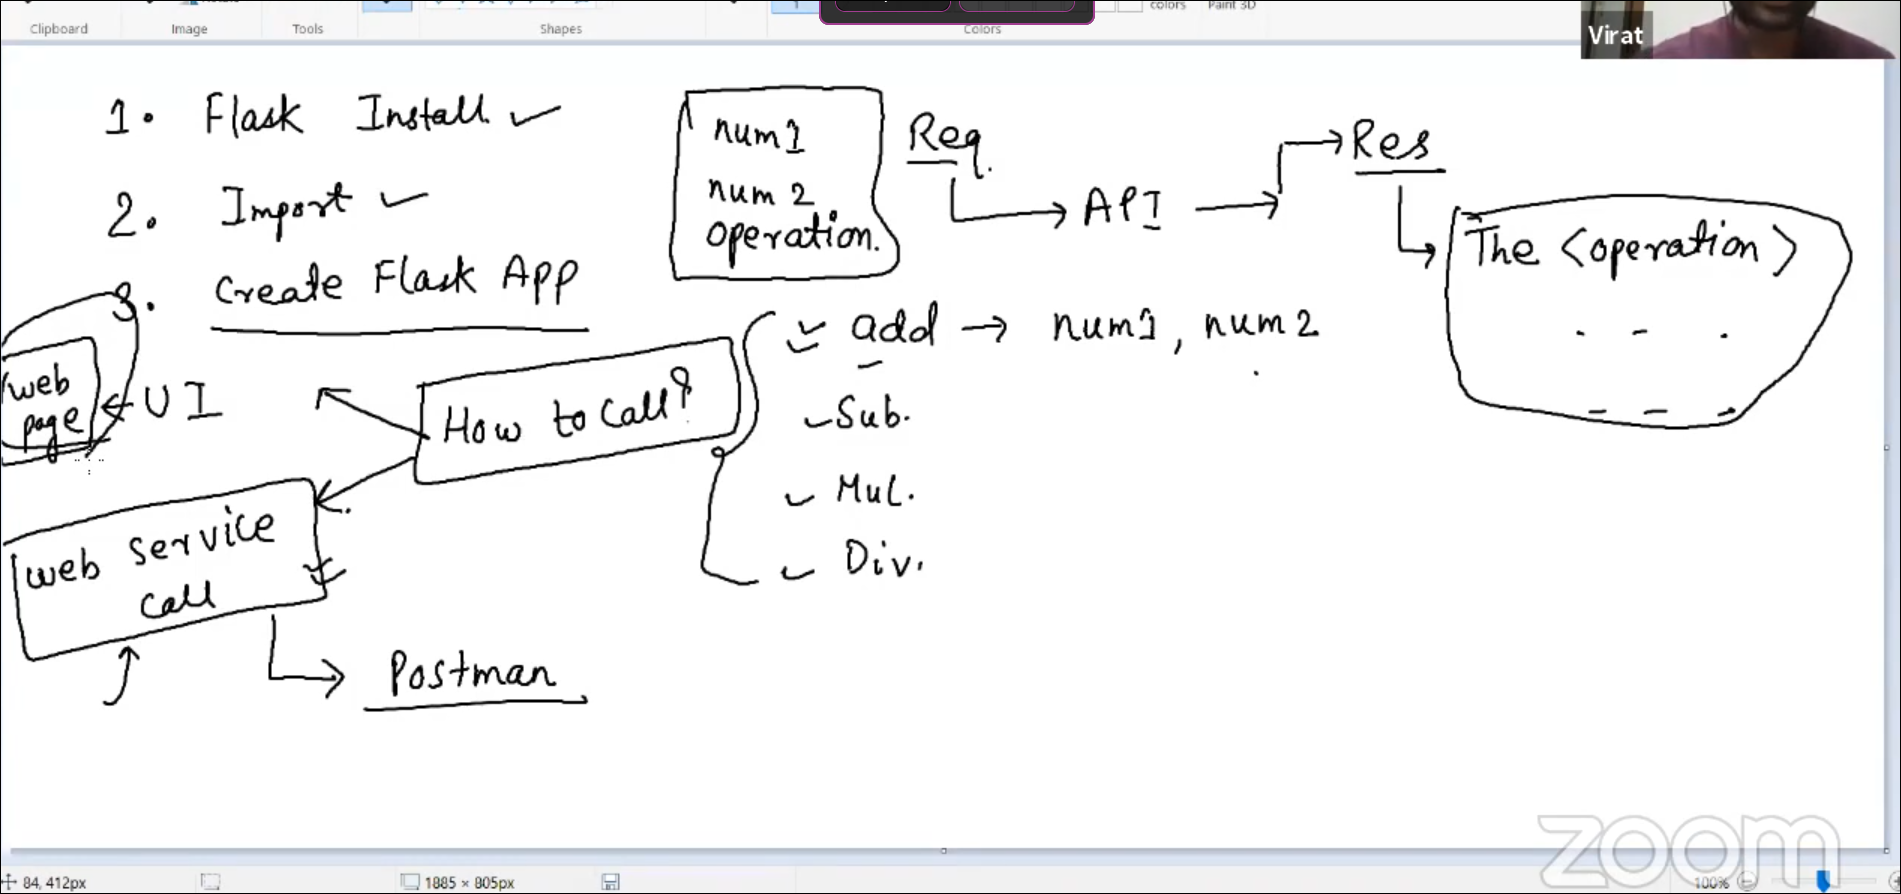

In [1]:

from IPython.display import Image, display

display(Image(filename='api3.png'))

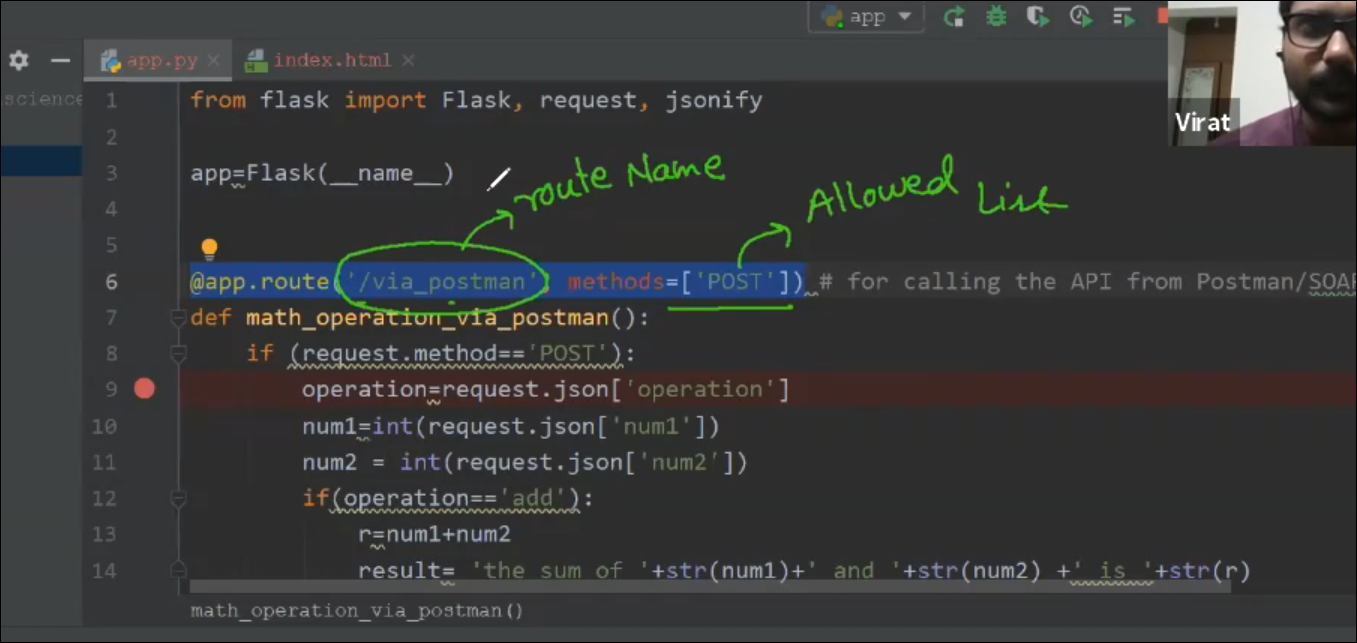

In [2]:
from IPython.display import Image, display

display(Image(filename='route.png'))

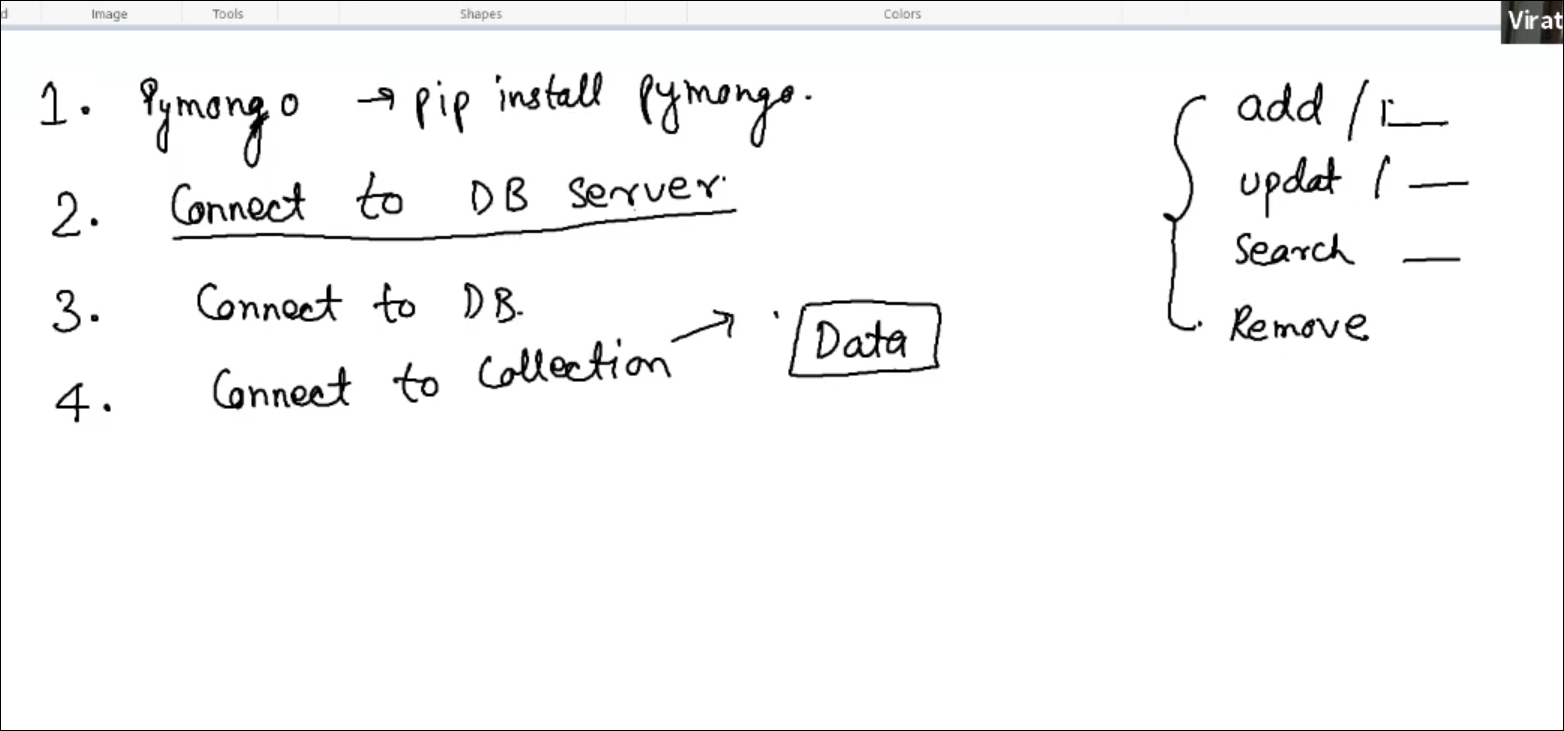

In [1]:
from IPython.display import Image, display

display(Image(filename='mongo.png'))

In [2]:
!pip install pymongo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.2 MB/s  0:00:00m ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pymongo]━━━ 1/2 [pymongo]


In [12]:
#pacage  which enable us to connect to the mongodb
import pymongo
dbConn=pymongo.MongoClient("mongodb://localhost:27017/")

In [19]:
dbname='crawlerDB'
db=dbConn[dbname] # connecting to the database  named ragib  present in the mongodb
#if the database is not present  it will automatically create it 

In [20]:
#show all the databases
print(dbConn.list_database_names())

['admin', 'config', 'crawlerDB', 'local']


In [21]:
#check if the database exists in mongodb
dblist=dbConn.list_database_names() #obtaining  all the dataabase names
print(dblist)
db_name='admin'
if db_name in dblist:
    print("THe database exist")
else:
    print("database not exist")

['admin', 'config', 'crawlerDB', 'local']
THe database exist


In [22]:
# connecting a collection   ---- collections are analogous to table
collection_name='mongo_demo'
collection=db[collection_name]#connection to the collection itself present in the database


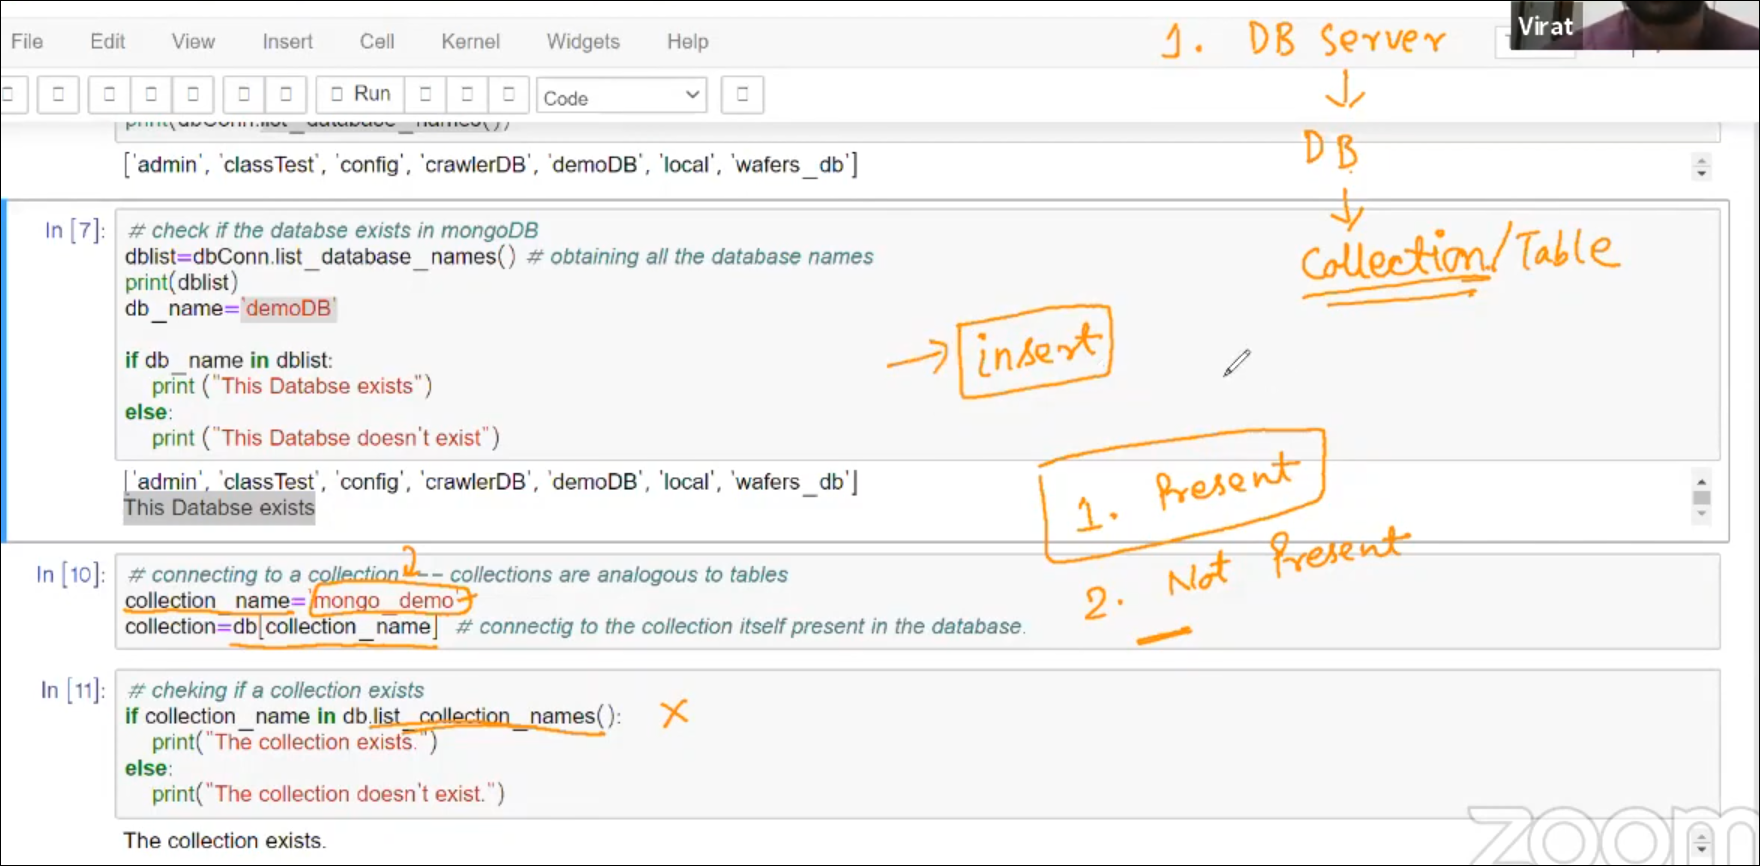

In [17]:
from IPython.display import Image, display

display(Image(filename='mongo1.png'))

In [23]:
#checking if a collection is exists
if collection_name in db.list_collection_names():
    print("The collection exist")
else:
    print('The collection doesnot exist')

The collection exist


In [26]:
#inserting rows into the collection
my_row={ 'Serial No':'9998',
         'GRE Score':'337',
         'University Rating':'4',
         'SOP':'4.5',
         'CGPA':'3.58',
         'Research':'1',
         'Change of admit':'0.92'
    
}

In [28]:
x=collection.insert_one(my_row) #inserting record  into the collection


DuplicateKeyError: E11000 duplicate key error collection: crawlerDB.mongo_demo index: _id_ dup key: { _id: ObjectId('6982450c86cdee0c8baec117') }, full error: {'index': 0, 'code': 11000, 'errmsg': "E11000 duplicate key error collection: crawlerDB.mongo_demo index: _id_ dup key: { _id: ObjectId('6982450c86cdee0c8baec117') }", 'keyPattern': {'_id': 1}, 'keyValue': {'_id': ObjectId('6982450c86cdee0c8baec117')}}

In [29]:
print(x.inserted_id)

6982450c86cdee0c8baec117


In [31]:
#inserting multiple rows once
my_rows=[
{
'Serial No': '9997',
'GRE Score': '337',
'TOEFL Score': '118',
'University Rating': '4',
'SOP': '4.5',
'LOR': '4.5',
'CGPA': '9.65',
'Research': '1',
'Chance of Admit': '0.92'},
{
'Serial No': '9996',
'GRE Score': '336',
'TOEFL Score': '118',
'University Rating': '4',
'SOP': '4.5',
'LOR': '4.5',
'CGPA': '9.6',
'Research': '0',
'Chance of Admit': '0.92'},
{
'Serial No': '9995',
'GRE Score': '337',
'TOEFL Score': '118',
'University Rating':'4',
'SOP': '4.5',
'LOR': '4.5',
'CGPA': '9.5',
 'Research':'0',
 'Chance of Admit': '0.92'},
{
'Serial No': '9994',
'GRE Score': '336',
'TOEFL Score': '148',
'University Rating':'4',
'SOP': '4.5',
'LOR': '4.5',
'CGPA': '9.5',
 'Research':'0',
 'Chance of Admit': '0.95'}

    ]

In [32]:
x=collection.insert_many(my_rows)

In [33]:
print(x.inserted_ids)

[ObjectId('698247ad86cdee0c8baec118'), ObjectId('698247ad86cdee0c8baec119'), ObjectId('698247ad86cdee0c8baec11a'), ObjectId('698247ad86cdee0c8baec11b')]


In [34]:
#retriving all  the records from collection
result=collection.find({})
result[3]

{'_id': ObjectId('698247ad86cdee0c8baec11a'),
 'Serial No': '9995',
 'GRE Score': '337',
 'TOEFL Score': '118',
 'University Rating': '4',
 'SOP': '4.5',
 'LOR': '4.5',
 'CGPA': '9.5',
 'Research': '0',
 'Chance of Admit': '0.92'}

whenever we are calling the find() method, if we have too many rows/records in the table, then we'll get too many responses for that which might overwhelm the application. To overcome this scenario, we have a way in mongoDB to have an upper limit on the number of rows returned.
It is called the limit() method.

In [47]:
#printing only the five rows
result_total=collection.find({}).limit(5)
for res in result_total:
    print(res)

{'_id': ObjectId('6982450c86cdee0c8baec117'), 'Serial No': '9998', 'GRE Score': '337', 'University Rating': '4', 'SOP': '4.5', 'CGPA': '3.58', 'Research': '1', 'Change of admit': '0.92'}
{'_id': ObjectId('698247ad86cdee0c8baec118'), 'Serial No': '9997', 'GRE Score': '337', 'TOEFL Score': '118', 'University Rating': '4', 'SOP': '4.5', 'LOR': '4.5', 'CGPA': '9.65', 'Research': '1', 'Chance of Admit': '0.92'}
{'_id': ObjectId('698247ad86cdee0c8baec119'), 'Serial No': '9996', 'GRE Score': '336', 'TOEFL Score': '118', 'University Rating': '4', 'SOP': '4.5', 'LOR': '4.5', 'CGPA': '9.6', 'Research': '0', 'Chance of Admit': '0.92'}
{'_id': ObjectId('698247ad86cdee0c8baec11a'), 'Serial No': '9995', 'GRE Score': '337', 'TOEFL Score': '118', 'University Rating': '4', 'SOP': '4.5', 'LOR': '4.5', 'CGPA': '9.5', 'Research': '0', 'Chance of Admit': '0.92'}
{'_id': ObjectId('698247ad86cdee0c8baec11b'), 'Serial No': '9994', 'GRE Score': '336', 'TOEFL Score': '148', 'University Rating': '4', 'SOP': '4.5

In [48]:
#retrinving some collumns
result_some=collection.find({},{"GRE Score", 'TOFEL Score'}) #retriving two collumns
#the second parameter in find() specifies which collumns to choose
for res in result_some:
    print(res)

{'_id': ObjectId('6982450c86cdee0c8baec117'), 'GRE Score': '337'}
{'_id': ObjectId('698247ad86cdee0c8baec118'), 'GRE Score': '337'}
{'_id': ObjectId('698247ad86cdee0c8baec119'), 'GRE Score': '336'}
{'_id': ObjectId('698247ad86cdee0c8baec11a'), 'GRE Score': '337'}
{'_id': ObjectId('698247ad86cdee0c8baec11b'), 'GRE Score': '336'}


In [51]:
#finding the rows satisfying a given criteria
my_db_query={'GRE Score':'337'}
#printing all the rows  where GRE Score is 337
result_GRE= collection.find(my_db_query)
for res in result_GRE:
    print(res)

{'_id': ObjectId('6982450c86cdee0c8baec117'), 'Serial No': '9998', 'GRE Score': '337', 'University Rating': '4', 'SOP': '4.5', 'CGPA': '3.58', 'Research': '1', 'Change of admit': '0.92'}
{'_id': ObjectId('698247ad86cdee0c8baec118'), 'Serial No': '9997', 'GRE Score': '337', 'TOEFL Score': '118', 'University Rating': '4', 'SOP': '4.5', 'LOR': '4.5', 'CGPA': '9.65', 'Research': '1', 'Chance of Admit': '0.92'}
{'_id': ObjectId('698247ad86cdee0c8baec11a'), 'Serial No': '9995', 'GRE Score': '337', 'TOEFL Score': '118', 'University Rating': '4', 'SOP': '4.5', 'LOR': '4.5', 'CGPA': '9.5', 'Research': '0', 'Chance of Admit': '0.92'}


In [57]:
#finding the rows satisfying a given criteria grater than
my_db_query={'GRE Score':{'$gt':'330'}}
#printing all the rows  where GRE Score is 337
result_GRE= collection.find(my_db_query).sort('GRE Score',-1)
for res in result_GRE:
    print(res)

{'_id': ObjectId('6982450c86cdee0c8baec117'), 'Serial No': '9998', 'GRE Score': '337', 'University Rating': '4', 'SOP': '4.5', 'CGPA': '3.58', 'Research': '1', 'Change of admit': '0.92'}
{'_id': ObjectId('698247ad86cdee0c8baec118'), 'Serial No': '9997', 'GRE Score': '337', 'TOEFL Score': '118', 'University Rating': '4', 'SOP': '4.5', 'LOR': '4.5', 'CGPA': '9.65', 'Research': '1', 'Chance of Admit': '0.92'}
{'_id': ObjectId('698247ad86cdee0c8baec11a'), 'Serial No': '9995', 'GRE Score': '337', 'TOEFL Score': '118', 'University Rating': '4', 'SOP': '4.5', 'LOR': '4.5', 'CGPA': '9.5', 'Research': '0', 'Chance of Admit': '0.92'}
{'_id': ObjectId('698247ad86cdee0c8baec119'), 'Serial No': '9996', 'GRE Score': '336', 'TOEFL Score': '118', 'University Rating': '4', 'SOP': '4.5', 'LOR': '4.5', 'CGPA': '9.6', 'Research': '0', 'Chance of Admit': '0.92'}
{'_id': ObjectId('698247ad86cdee0c8baec11b'), 'Serial No': '9994', 'GRE Score': '336', 'TOEFL Score': '148', 'University Rating': '4', 'SOP': '4.5

In [58]:
#deleting records from mongodb
#finfing the rows satisfying a given criteria
my_db_query={'GRE Score':'337'}
x=collection.delete_one(my_db_query)
print(x.deleted_count)

# We have succesfully deleted one row/record from the collection.
# Similarly, for deleting multiple rows, we can use collection.delete_many(my_deb_query
# For deleting all documents of a collection, we can use collection.delete_many(())

1


In [60]:
# For dropping an entire collection
collection_to_drop=db['test_collection'] #drops the entire collection named test collection
collection_to_drop.drop()

In [63]:
#updating
update_criteria={"GRE Score":'340'}
new_values={ "$set":{"GRE Score":"360"}}
x=collection.update_many(update_criteria, new_values)
print(x.modified_count)
9
# We have updated the nine columns with GRE Score 340 with GRE Score 350.
# Similarly, we can update only one row by using the function update_one(update_criteria, new_values)
# Type Markdown and LaTeX:

0
